In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os

from gmm_posterior import gmm_posterior


Plot results for banknote-authentication with mixing matrix from Noisy Natarajan

In [17]:
df_list = []
folder_path = 'Results/banknote-authentication_Noisy_Natarajan'
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Append the DataFrame to the list
        df_list.append(df)

merged_df = pd.concat(df_list, ignore_index=True)
merged_df

,epoch,train_loss,train_acc,test_acc,train_detached_loss,test_detached_loss,optimizer,loss_fn,repetition,initial_lr,actual_lr,corr_p
0,1,0.626491,0.634458,0.661818,0.018250,0.018797,Adam,Backward_conv,0,0.001,0.001,0.2
1,2,0.539021,0.696445,0.727273,0.016072,0.016616,Adam,Backward_conv,0,0.001,0.001,0.2
2,3,0.479369,0.766636,0.789091,0.014379,0.014853,Adam,Backward_conv,0,0.001,0.001,0.2
3,4,0.431421,0.821331,0.832727,0.013000,0.013410,Adam,Backward_conv,0,0.001,0.001,0.2
4,5,0.392063,0.854148,0.872727,0.011863,0.012224,Adam,Backward_conv,0,0.001,0.001,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...
13495,96,0.361631,0.988149,0.989091,0.002033,0.002184,Adam,Forward,9,0.001,0.001,0.4
13496,97,0.361510,0.988149,0.989091,0.002021,0.002171,Adam,Forward,9,0.001,0.001,0.4
13497,98,0.361392,0.988149,0.989091,0.002010,0.002159,Adam,Forward,9,0.001,0.001,0.4
13498,99,0.361275,0.988149,0.989091,0.001998,0.002147,Adam,Forward,9,0.001,0.001,0.4


C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_48476\1622455980.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['(0.2,0.2)','(0.3,0.1)','(0.4,0.4)'])


['Backward_conv', 'Backward', 'Forward_opt', 'Forward']


C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_48476\1622455980.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['(0.2,0.2)','(0.3,0.1)','(0.4,0.4)'])


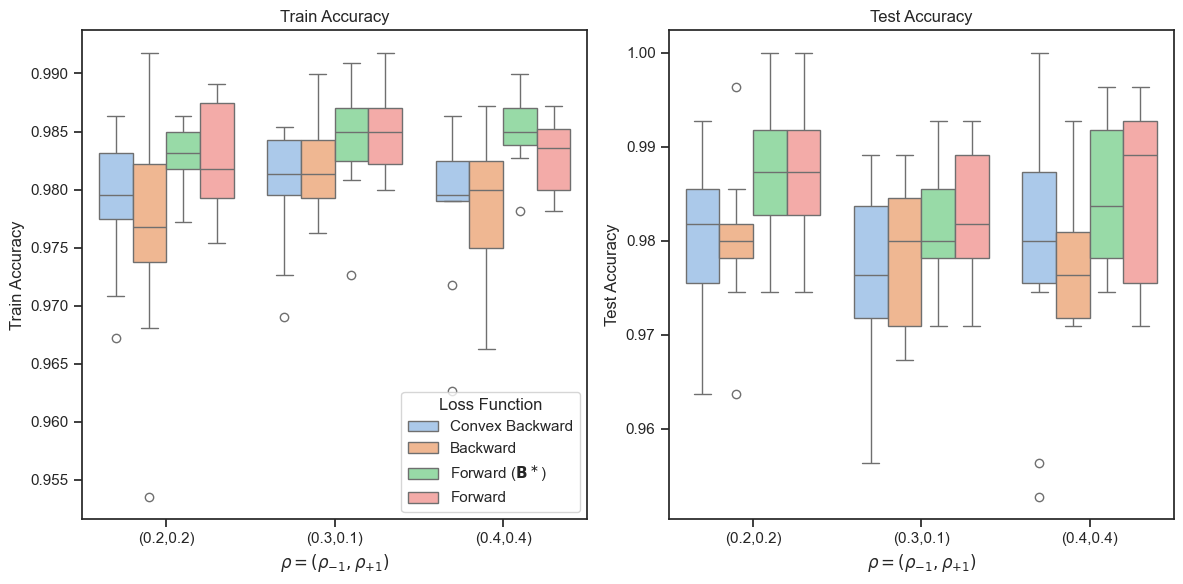

In [21]:
#last_epoch_df = merged_df.loc[merged_df.groupby(['repetition', 'corr_p', 'loss_fn'])['epoch'].idxmax()]
epoch_50_df = merged_df[merged_df['epoch'] == 30]


selected_loss_fns = ['Backward','Backward_conv', 'Forward', 'Forward_opt']
epoch_50_df = epoch_50_df[epoch_50_df['loss_fn'].isin(selected_loss_fns)]

sns.set_theme(style="ticks", palette="pastel")
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

# Boxplot for train_acc
sns.boxplot(data=epoch_50_df, x='corr_p', y='train_acc', hue='loss_fn', ax=axes[0])
axes[0].set_title('Train Accuracy')
axes[0].set_xlabel(r'$\rho=(\rho_{-1},\rho_{+1})$')
axes[0].set_ylabel('Train Accuracy')
axes[0].set_xticklabels(['(0.2,0.2)','(0.3,0.1)','(0.4,0.4)'])
# Get the handles and labels from the current legend
handles, labels = axes[0].get_legend_handles_labels()
print(labels)
# Set the new legend labels
new_labels = [r'Convex Backward',r'Backward',r'Forward (${\bf B}^\ast$)',r'Forward']  
axes[0].legend(handles, new_labels, title='Loss Function')
#axes[0].legend(title='Loss', loc='lower left', labels=[r'Backward (${\bf B}^\ast$)',r'Backward',r'Forward (${\bf B}^\ast$)',r'Forward'])

# Boxplot for test_acc
sns.boxplot(data=epoch_50_df, x='corr_p', y='test_acc', hue='loss_fn', ax=axes[1])
axes[1].set_title('Test Accuracy')
axes[1].set_xlabel(r'$\rho=(\rho_{-1},\rho_{+1})$')
axes[1].set_ylabel('Test Accuracy')
axes[1].set_xticklabels(['(0.2,0.2)','(0.3,0.1)','(0.4,0.4)'])
axes[1].legend().remove()


# Adjust layout
plt.tight_layout()
plt.show()

# MNIST
## Noisy Natarajan

In [2]:
df_list = []
folder_path = 'Results/mnist_Noisy_Patrini_MNIST'
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Append the DataFrame to the list
        df_list.append(df)

merged_df = pd.concat(df_list, ignore_index=True)
merged_df

,epoch,train_loss,train_acc,test_acc,train_detached_loss,test_detached_loss,optimizer,loss_fn,repetition,initial_lr,actual_lr,corr_p
0,1,0.537185,0.840133,0.9337,0.007260,0.007092,Adam,Backward_opt,0,0.001,0.001,0.3
1,2,0.195893,0.933567,0.9514,0.004744,0.005009,Adam,Backward_opt,0,0.001,0.001,0.3
2,3,0.123378,0.948650,0.9604,0.003660,0.004151,Adam,Backward_opt,0,0.001,0.001,0.3
3,4,0.075033,0.956533,0.9659,0.002888,0.003538,Adam,Backward_opt,0,0.001,0.001,0.3
4,5,0.033166,0.962817,0.9673,0.002609,0.003563,Adam,Backward_opt,0,0.001,0.001,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...
5995,46,0.161515,0.993000,0.9795,0.000968,0.003488,Adam,Forward,9,0.001,0.001,0.8
5996,47,0.159963,0.992933,0.9796,0.000905,0.003483,Adam,Forward,9,0.001,0.001,0.8
5997,48,0.159497,0.993050,0.9784,0.000927,0.003628,Adam,Forward,9,0.001,0.001,0.8
5998,49,0.160310,0.993083,0.9766,0.001054,0.003912,Adam,Forward,9,0.001,0.001,0.8


In [54]:
#This is for preventing an error in the dataframe comming from an older version
'''
# Loop through the file indices from 0 to 9
for i in range(10):
    # Construct the file path
    file_path = f'Results/mnist_Noisy_Patrini_MNIST/Forward_opt_p_+0.5p_-None_{i}.csv'
    
    # Load the CSV file
    df = pd.read_csv(file_path)
    
    # Update the 'loss_fn' column to "Backward_opt"
    df['loss_fn'] = 'Forward_opt'
    
    # Save the updated DataFrame back to the CSV file
    df.to_csv(file_path, index=False)

    print(f"Updated the 'loss_fn' column in {file_path} successfully.")
'''

Updated the 'loss_fn' column in Results/mnist_Noisy_Patrini_MNIST/Forward_opt_p_+0.5p_-None_0.csv successfully.
Updated the 'loss_fn' column in Results/mnist_Noisy_Patrini_MNIST/Forward_opt_p_+0.5p_-None_1.csv successfully.
Updated the 'loss_fn' column in Results/mnist_Noisy_Patrini_MNIST/Forward_opt_p_+0.5p_-None_2.csv successfully.
Updated the 'loss_fn' column in Results/mnist_Noisy_Patrini_MNIST/Forward_opt_p_+0.5p_-None_3.csv successfully.
Updated the 'loss_fn' column in Results/mnist_Noisy_Patrini_MNIST/Forward_opt_p_+0.5p_-None_4.csv successfully.
Updated the 'loss_fn' column in Results/mnist_Noisy_Patrini_MNIST/Forward_opt_p_+0.5p_-None_5.csv successfully.
Updated the 'loss_fn' column in Results/mnist_Noisy_Patrini_MNIST/Forward_opt_p_+0.5p_-None_6.csv successfully.
Updated the 'loss_fn' column in Results/mnist_Noisy_Patrini_MNIST/Forward_opt_p_+0.5p_-None_7.csv successfully.
Updated the 'loss_fn' column in Results/mnist_Noisy_Patrini_MNIST/Forward_opt_p_+0.5p_-None_8.csv succes

C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_42596\3835082459.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['0.3','0.5','0.8'])
C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_42596\3835082459.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['0.3','0.5','0.8'])


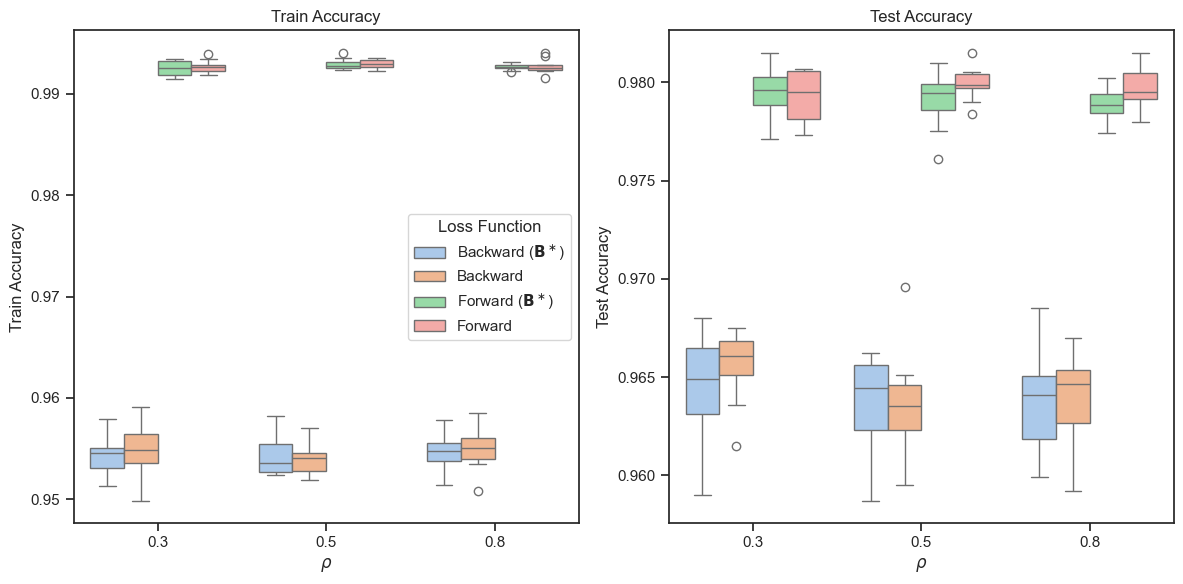

In [4]:
#epoch_50_df = merged_df[merged_df['epoch'] == 30]
epoch_50_df = merged_df.loc[merged_df.groupby(['repetition', 'corr_p', 'loss_fn'])['epoch'].idxmax()]

sns.set_theme(style="ticks", palette="pastel")
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

# Boxplot for train_acc
sns.boxplot(data=epoch_50_df, x='corr_p', y='train_acc', hue='loss_fn', ax=axes[0])
axes[0].set_title('Train Accuracy')
axes[0].set_xlabel(r'$\rho$')
axes[0].set_ylabel('Train Accuracy')
axes[0].set_xticklabels(['0.3','0.5','0.8'])
# Get the handles and labels from the current legend
handles, labels = axes[0].get_legend_handles_labels()

# Set the new legend labels
new_labels = [r'Backward (${\bf B}^\ast$)',r'Backward',r'Forward (${\bf B}^\ast$)',r'Forward']  
axes[0].legend(handles, new_labels, title='Loss Function')
#axes[0].legend(title='Loss', loc='lower left', labels=[r'Backward (${\bf B}^\ast$)',r'Backward',r'Forward (${\bf B}^\ast$)',r'Forward'])

# Boxplot for test_acc
sns.boxplot(data=epoch_50_df, x='corr_p', y='test_acc', hue='loss_fn', ax=axes[1])
axes[1].set_title('Test Accuracy')
axes[1].set_xlabel(r'$\rho$')
axes[1].set_ylabel('Test Accuracy')
axes[1].set_xticklabels(['0.3','0.5','0.8'])
axes[1].legend().remove()


# Adjust layout
plt.tight_layout()
plt.show()

In [11]:
merged_df.loss_fn.unique()

array(['FwdBwdLoss'], dtype=object)

# MNIST
## pll


In [3]:
df_list = []
folder_path = 'Results/mnist_pll'
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Append the DataFrame to the list
        df_list.append(df)

merged_df = pd.concat(df_list, ignore_index=True)
merged_df

,epoch,train_loss,train_acc,test_acc,train_detached_loss,test_detached_loss,optimizer,loss_fn,repetition,initial_lr,actual_lr,corr_p
0,1,0.696842,0.803017,0.9081,0.010283,0.009886,Adam,Backward_conv,0,0.001,0.001,0.3
1,2,0.279769,0.901433,0.9245,0.007994,0.007960,Adam,Backward_conv,0,0.001,0.001,0.3
2,3,0.164928,0.916717,0.9334,0.006911,0.007105,Adam,Backward_conv,0,0.001,0.001,0.3
3,4,0.075458,0.925017,0.9350,0.006547,0.007006,Adam,Backward_conv,0,0.001,0.001,0.3
4,5,-0.017878,0.926917,0.9390,0.005980,0.006755,Adam,Backward_conv,0,0.001,0.001,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...
11495,46,1.808855,0.826667,0.8786,0.043608,0.044319,Adam,LBL,9,0.001,0.001,0.5
11496,47,1.800952,0.825233,0.8773,0.043333,0.044140,Adam,LBL,9,0.001,0.001,0.5
11497,48,1.801141,0.823833,0.8738,0.043697,0.044394,Adam,LBL,9,0.001,0.001,0.5
11498,49,1.794421,0.822417,0.8767,0.043502,0.044282,Adam,LBL,9,0.001,0.001,0.5


['Backward', 'Backward_opt_conv', 'Forward', 'Forward_opt', 'LBL']


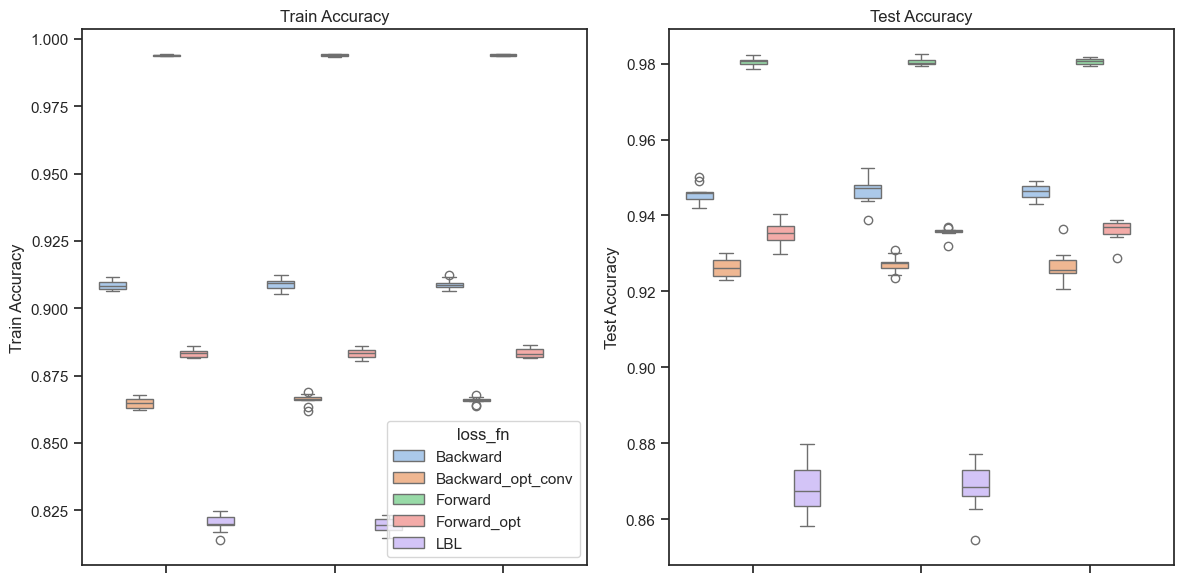

In [6]:
epoch_50_df = merged_df.loc[merged_df.groupby(['repetition', 'corr_p', 'loss_fn'])['epoch'].idxmax()]
selected_items = ['Backward', 'Backward_opt_conv', 'Forward', 'Forward_opt', 'LBL']
epoch_50_df = epoch_50_df[epoch_50_df['loss_fn'].isin(selected_items)]

sns.set_theme(style="ticks", palette="pastel")

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

# Boxplot for train_acc
sns.boxplot(data=epoch_50_df, x='corr_p', y='train_acc', hue='loss_fn', ax=axes[0])
axes[0].set_title('Train Accuracy')
axes[0].set(xlabel=None)
axes[0].set_ylabel('Train Accuracy')
axes[0].set(xticklabels=[])
# Get the handles and labels from the current legend
handles, labels = axes[0].get_legend_handles_labels()
print(labels)

# Set the new legend labels
#new_labels = [r'Backward (${\bf B}^\ast$)',r'Backward',r'Forward (${\bf B}^\ast$)',r'Forward']  
#axes[0].legend(handles, new_labels, title='Loss Function')
#axes[0].legend(title='Loss', loc='lower left', labels=[r'Backward (${\bf B}^\ast$)',r'Backward',r'Forward (${\bf B}^\ast$)',r'Forward'])

# Boxplot for test_acc
sns.boxplot(data=epoch_50_df, x='corr_p', y='test_acc', hue='loss_fn', ax=axes[1])
axes[1].set_title('Test Accuracy')
axes[1].set(xlabel=None)
axes[1].set_ylabel('Test Accuracy')
axes[1].set(xticklabels=[])
axes[1].legend().remove()


# Adjust layout
plt.tight_layout()
plt.show()

In [10]:
import pandas as pd

# Group by `loss_fn` and `corr_p` and then calculate mean and standard deviation
agg_df = epoch_50_df.groupby(['loss_fn', 'corr_p']).agg(
    train_acc_mean=('train_acc', 'mean'),
    train_acc_std=('train_acc', 'std'),
    test_acc_mean=('test_acc', 'mean'),
    test_acc_std=('test_acc', 'std')
).reset_index()

# Create a pivot table to format the results as required
pivot_df = agg_df.pivot(index='loss_fn', columns='corr_p', values=['train_acc_mean', 'train_acc_std', 'test_acc_mean', 'test_acc_std'])

# Format the values as 'mean (std)' for train and test accuracy
formatted_df = pd.DataFrame({
    '0.30': pivot_df.apply(lambda row: f"{row['train_acc_mean'][0.30]:.3f} ({row['train_acc_std'][0.30]:.3f}) / {row['test_acc_mean'][0.30]:.3f} ({row['test_acc_std'][0.30]:.3f})", axis=1),
    '0.50': pivot_df.apply(lambda row: f"{row['train_acc_mean'][0.50]:.3f} ({row['train_acc_std'][0.50]:.3f}) / {row['test_acc_mean'][0.50]:.3f} ({row['test_acc_std'][0.50]:.3f})", axis=1),
    '0.80': pivot_df.apply(lambda row: f"{row['train_acc_mean'][0.80]:.3f} ({row['train_acc_std'][0.80]:.3f}) / {row['test_acc_mean'][0.80]:.3f} ({row['test_acc_std'][0.80]:.3f})", axis=1)
})

# Convert the formatted DataFrame to a LaTeX table string
latex_table = formatted_df.to_latex(index=True, caption="Performance Metrics (Mean and Std) across Repetitions", label="tab:mean_std_performance_metrics", header=['0.10', '0.20', '0.30'], column_format="lccc")

# Print or save the LaTeX table string
print(latex_table)


\begin{table}
\caption{Performance Metrics (Mean and Std) across Repetitions}
\label{tab:mean_std_performance_metrics}
\begin{tabular}{lccc}
\toprule
 & 0.10 & 0.20 & 0.30 \\
loss_fn &  &  &  \\
\midrule
Backward & 0.909 (0.002) / 0.946 (0.002) & 0.909 (0.002) / 0.946 (0.004) & 0.909 (0.002) / 0.946 (0.002) \\
Backward_opt_conv & 0.865 (0.002) / 0.926 (0.003) & 0.866 (0.002) / 0.927 (0.002) & 0.866 (0.001) / 0.927 (0.004) \\
Forward & 0.994 (0.000) / 0.981 (0.001) & 0.994 (0.000) / 0.980 (0.001) & 0.994 (0.000) / 0.981 (0.001) \\
Forward_opt & 0.883 (0.001) / 0.935 (0.004) & 0.883 (0.002) / 0.936 (0.001) & 0.883 (0.002) / 0.936 (0.003) \\
LBL & 0.820 (0.003) / 0.868 (0.007) & 0.819 (0.003) / 0.869 (0.007) & nan (nan) / nan (nan) \\
\bottomrule
\end{tabular}
\end{table}



# GMM
## Complementary

In [12]:
df_list = []
folder_path = 'Results/gmm_Complementary'
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Append the DataFrame to the list
        df_list.append(df)

merged_df = pd.concat(df_list, ignore_index=True)
merged_df

,epoch,train_loss,train_acc,test_acc,train_detached_loss,test_detached_loss,optimizer,loss_fn,repetition,initial_lr,actual_lr,corr_p
0,1,1.102756,0.791250,0.78875,0.028877,0.028993,Adam,Backward_conv,0,0.001,0.001,0.2
1,2,0.820721,0.799063,0.78875,0.023166,0.023332,Adam,Backward_conv,0,0.001,0.001,0.2
2,3,0.686394,0.799687,0.78875,0.020339,0.020530,Adam,Backward_conv,0,0.001,0.001,0.2
3,4,0.613837,0.800000,0.79000,0.018744,0.018949,Adam,Backward_conv,0,0.001,0.001,0.2
4,5,0.568805,0.800000,0.79000,0.017736,0.017951,Adam,Backward_conv,0,0.001,0.001,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,46,1.184316,0.873437,0.87500,0.011276,0.011895,Adam,Forward,9,0.001,0.001,0.2
2496,47,1.184124,0.873750,0.87500,0.011241,0.011864,Adam,Forward,9,0.001,0.001,0.2
2497,48,1.183939,0.874688,0.87500,0.011208,0.011834,Adam,Forward,9,0.001,0.001,0.2
2498,49,1.183761,0.875000,0.87500,0.011175,0.011804,Adam,Forward,9,0.001,0.001,0.2


['Backward', 'Backward_conv', 'Backward_opt', 'Forward', 'Forward_opt']


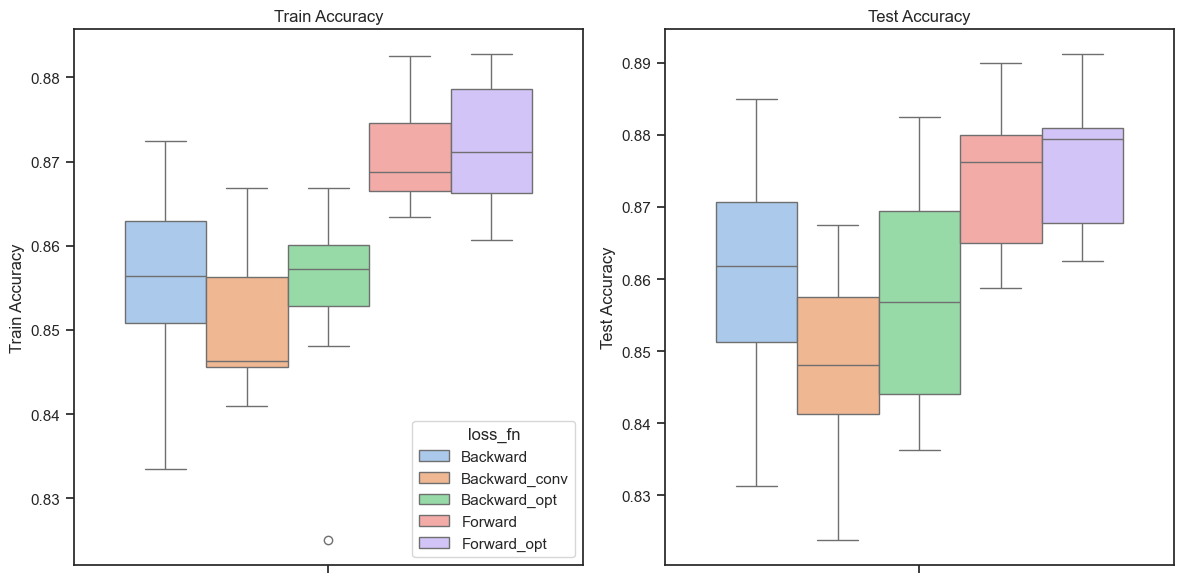

In [16]:
#epoch_50_df = merged_df[merged_df['epoch'] == 30]
epoch_50_df = merged_df.loc[merged_df.groupby(['repetition', 'corr_p', 'loss_fn'])['epoch'].idxmax()]

sns.set_theme(style="ticks", palette="pastel")
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

# Boxplot for train_acc
sns.boxplot(data=epoch_50_df, x='corr_p', y='train_acc', hue='loss_fn', ax=axes[0])
axes[0].set_title('Train Accuracy')
axes[0].set(xlabel=None)
axes[0].set_ylabel('Train Accuracy')
axes[0].set(xticklabels=[])
# Get the handles and labels from the current legend
handles, labels = axes[0].get_legend_handles_labels()
print(labels)

# Set the new legend labels
#new_labels = [r'Backward (${\bf B}^\ast$)',r'Backward',r'Forward (${\bf B}^\ast$)',r'Forward']  
#axes[0].legend(handles, new_labels, title='Loss Function')
#axes[0].legend(title='Loss', loc='lower left', labels=[r'Backward (${\bf B}^\ast$)',r'Backward',r'Forward (${\bf B}^\ast$)',r'Forward'])

# Boxplot for test_acc
sns.boxplot(data=epoch_50_df, x='corr_p', y='test_acc', hue='loss_fn', ax=axes[1])
axes[1].set_title('Test Accuracy')
axes[1].set(xlabel=None)
axes[1].set_ylabel('Test Accuracy')
axes[1].set(xticklabels=[])
axes[1].legend().remove()


# Adjust layout
plt.tight_layout()
plt.show()

# MNIST
## Complementary

In [2]:
df_list = []
folder_path = 'Results/mnist_Complementary'
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Append the DataFrame to the list
        df_list.append(df)

merged_df = pd.concat(df_list, ignore_index=True)
merged_df

,epoch,train_loss,train_acc,test_acc,train_detached_loss,test_detached_loss,optimizer,loss_fn,repetition,initial_lr,actual_lr,corr_p
0,1,1.830769,0.463700,0.7047,0.039100,0.039146,Adam,Backward_opt,0,0.001,0.001,0.1
1,2,0.562884,0.707267,0.7899,0.027436,0.027066,Adam,Backward_opt,0,0.001,0.001,0.1
2,3,-0.511804,0.746200,0.7981,0.025305,0.024861,Adam,Backward_opt,0,0.001,0.001,0.1
3,4,-1.430249,0.744950,0.7881,0.026885,0.026658,Adam,Backward_opt,0,0.001,0.001,0.1
4,5,-2.404669,0.737500,0.7947,0.027589,0.027384,Adam,Backward_opt,0,0.001,0.001,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,46,2.197652,0.930100,0.9448,0.016298,0.015187,Adam,Forward,9,0.001,0.001,0.1
1996,47,2.197915,0.928967,0.9443,0.017060,0.015307,Adam,Forward,9,0.001,0.001,0.1
1997,48,2.198173,0.928217,0.9398,0.017701,0.016901,Adam,Forward,9,0.001,0.001,0.1
1998,49,2.197945,0.929617,0.9411,0.016765,0.016073,Adam,Forward,9,0.001,0.001,0.1


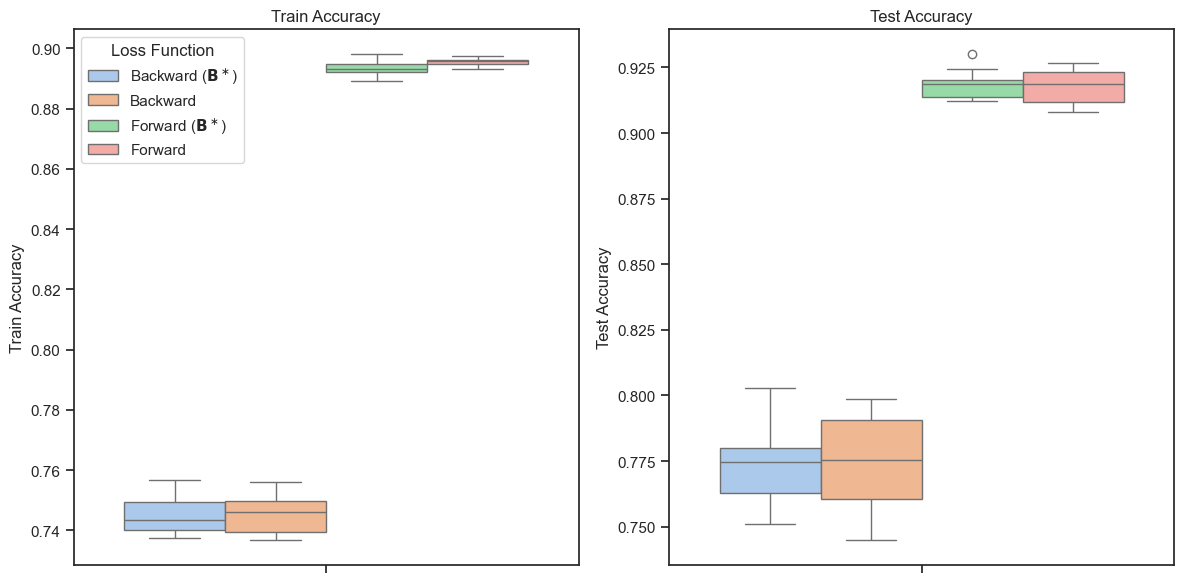

In [11]:
epoch_50_df = merged_df[merged_df['epoch'] == 5]
#epoch_50_df = merged_df.loc[merged_df.groupby(['repetition', 'corr_p', 'loss_fn'])['epoch'].idxmax()]

sns.set_theme(style="ticks", palette="pastel")
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

# Boxplot for train_acc
sns.boxplot(data=epoch_50_df, x='corr_p', y='train_acc', hue='loss_fn', ax=axes[0])
axes[0].set_title('Train Accuracy')
axes[0].set(xlabel=None)
axes[0].set_ylabel('Train Accuracy')
axes[0].set(xticklabels=[])
# Get the handles and labels from the current legend
handles, labels = axes[0].get_legend_handles_labels()

# Set the new legend labels
new_labels = [r'Backward (${\bf B}^\ast$)',r'Backward',r'Forward (${\bf B}^\ast$)',r'Forward']  
axes[0].legend(handles, new_labels, title='Loss Function')
#axes[0].legend(title='Loss', loc='lower left', labels=[r'Backward (${\bf B}^\ast$)',r'Backward',r'Forward (${\bf B}^\ast$)',r'Forward'])

# Boxplot for test_acc
sns.boxplot(data=epoch_50_df, x='corr_p', y='test_acc', hue='loss_fn', ax=axes[1])
axes[1].set_title('Test Accuracy')
axes[1].set(xlabel=None)
axes[1].set_ylabel('Test Accuracy')
axes[1].set(xticklabels=[])
axes[1].legend().remove()


# Adjust layout
plt.tight_layout()
plt.show()

In [8]:
merged_df

,epoch,train_loss,train_acc,test_acc,train_detached_loss,test_detached_loss,optimizer,loss_fn,repetition,initial_lr,actual_lr,corr_p
0,1,1.830769,0.463700,0.7047,0.039100,0.039146,Adam,Backward_opt,0,0.001,0.001,0.1
1,2,0.562884,0.707267,0.7899,0.027436,0.027066,Adam,Backward_opt,0,0.001,0.001,0.1
2,3,-0.511804,0.746200,0.7981,0.025305,0.024861,Adam,Backward_opt,0,0.001,0.001,0.1
3,4,-1.430249,0.744950,0.7881,0.026885,0.026658,Adam,Backward_opt,0,0.001,0.001,0.1
4,5,-2.404669,0.737500,0.7947,0.027589,0.027384,Adam,Backward_opt,0,0.001,0.001,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,46,2.197652,0.930100,0.9448,0.016298,0.015187,Adam,Forward,9,0.001,0.001,0.1
1996,47,2.197915,0.928967,0.9443,0.017060,0.015307,Adam,Forward,9,0.001,0.001,0.1
1997,48,2.198173,0.928217,0.9398,0.017701,0.016901,Adam,Forward,9,0.001,0.001,0.1
1998,49,2.197945,0.929617,0.9411,0.016765,0.016073,Adam,Forward,9,0.001,0.001,0.1


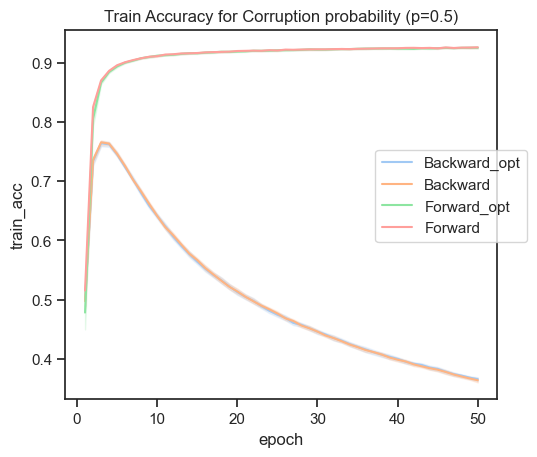

In [9]:
#filtered_df = df[df['Loss'].isin(['Forward', 'Backward', 'Forward',r'Forward-Backward (${\bf B}^\ast$)',r'Forward-Backward (${\bf B}={\bf I}$)',r'Forward-Backward (${\bf B}={\bf M}_{li}$)']) & 
#                 (df['Corruption (p)']==0.5)]
# Plot the responses for different events and regions
sns.lineplot(x="epoch", y="train_acc",
             hue="loss_fn",
             data=merged_df)
plt.title("Train Accuracy for Corruption probability (p=0.5)")
plt.subplots_adjust(right=0.8)
#plt.legend(loc='lower left', ncol=1, framealpha=0.8)
plt.legend(loc='center left', bbox_to_anchor=(0.7, 0.55), ncol=1, framealpha=0.8)
plt.show()

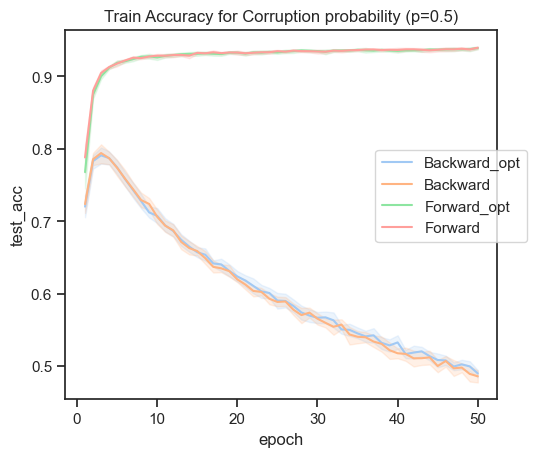

In [10]:
sns.lineplot(x="epoch", y="test_acc",
             hue="loss_fn",
             data=merged_df)
plt.title("Train Accuracy for Corruption probability (p=0.5)")
plt.subplots_adjust(right=0.8)
#plt.legend(loc='lower left', ncol=1, framealpha=0.8)
plt.legend(loc='center left', bbox_to_anchor=(0.7, 0.55), ncol=1, framealpha=0.8)
plt.show()

# GMM
## Partial

In [11]:
df_list = []
folder_path = 'Results/gmm_pll'
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Append the DataFrame to the list
        df_list.append(df)

merged_df = pd.concat(df_list, ignore_index=True)
merged_df

,epoch,train_loss,train_acc,test_acc,train_detached_loss,test_detached_loss,optimizer,loss_fn,repetition,initial_lr,actual_lr,corr_p
0,1,1.180684,0.492188,0.72125,0.029628,0.030255,Adam,Backward_conv,0,0.001,0.001,0.3
1,2,0.827813,0.779062,0.79000,0.022282,0.022911,Adam,Backward_conv,0,0.001,0.001,0.3
2,3,0.670649,0.803750,0.80375,0.018801,0.019425,Adam,Backward_conv,0,0.001,0.001,0.3
3,4,0.592105,0.811562,0.81125,0.016858,0.017481,Adam,Backward_conv,0,0.001,0.001,0.3
4,5,0.546151,0.816562,0.81750,0.015619,0.016243,Adam,Backward_conv,0,0.001,0.001,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...
10495,46,1.293789,0.794687,0.79500,0.035921,0.035908,Adam,LBL,9,0.001,0.001,0.8
10496,47,1.293790,0.794687,0.79500,0.035921,0.035908,Adam,LBL,9,0.001,0.001,0.8
10497,48,1.293790,0.794687,0.79500,0.035921,0.035908,Adam,LBL,9,0.001,0.001,0.8
10498,49,1.293791,0.794687,0.79500,0.035921,0.035908,Adam,LBL,9,0.001,0.001,0.8


['Backward', 'Backward_conv', 'Backward_opt_conv', 'Forward', 'Forward_opt']


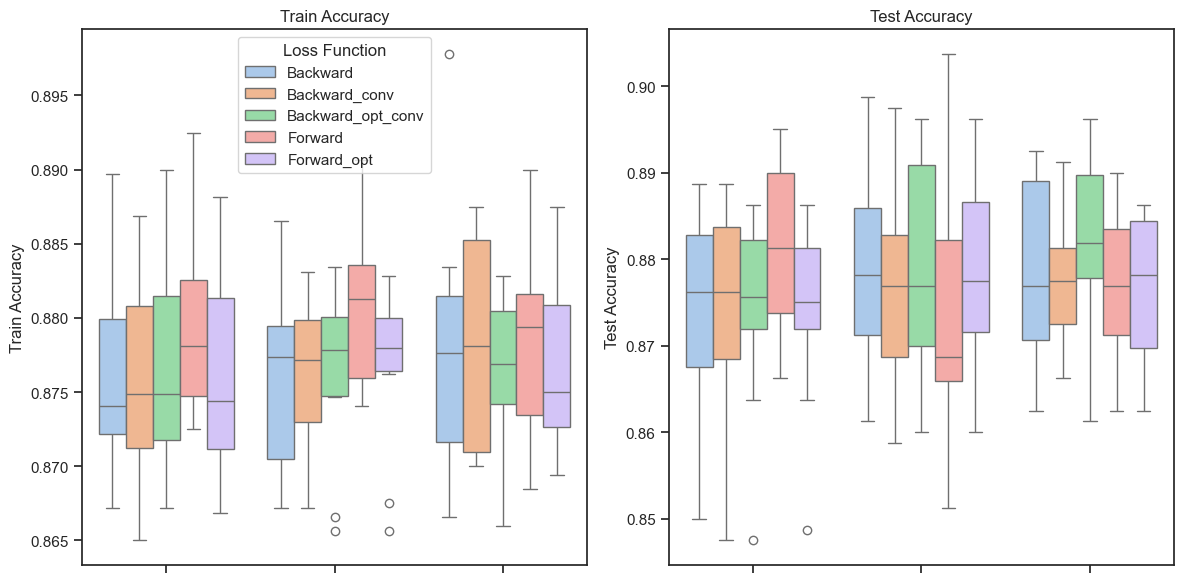

In [16]:
#epoch_50_df = merged_df[merged_df['epoch'] == 5]
loss_fn_filter = ['Backward', 'Backward_conv', 'Backward_opt_conv', 'Forward', 'Forward_opt']

epoch_50_df = merged_df[merged_df['loss_fn'].isin(loss_fn_filter)]

# Then, apply the grouping and idxmax operation
epoch_50_df = epoch_50_df.loc[epoch_50_df.groupby(['repetition', 'corr_p', 'loss_fn'])['epoch'].idxmax()]

#epoch_50_df = merged_df.loc[merged_df.groupby(['repetition', 'corr_p', 'loss_fn'])['epoch'].idxmax()]

sns.set_theme(style="ticks", palette="pastel")
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

# Boxplot for train_acc
sns.boxplot(data=epoch_50_df, x='corr_p', y='train_acc', hue='loss_fn', ax=axes[0])
axes[0].set_title('Train Accuracy')
axes[0].set(xlabel=None)
axes[0].set_ylabel('Train Accuracy')
axes[0].set(xticklabels=[])
# Get the handles and labels from the current legend
handles, labels = axes[0].get_legend_handles_labels()
print(labels)
# Set the new legend labels
#new_labels = [r'Backward (${\bf B}^\ast$)',r'Backward',r'Forward (${\bf B}^\ast$)',r'Forward']  
axes[0].legend(handles, labels, title='Loss Function')
#axes[0].legend(title='Loss', loc='lower left', labels=[r'Backward (${\bf B}^\ast$)',r'Backward',r'Forward (${\bf B}^\ast$)',r'Forward'])

# Boxplot for test_acc
sns.boxplot(data=epoch_50_df, x='corr_p', y='test_acc', hue='loss_fn', ax=axes[1])
axes[1].set_title('Test Accuracy')
axes[1].set(xlabel=None)
axes[1].set_ylabel('Test Accuracy')
axes[1].set(xticklabels=[])
axes[1].legend().remove()


# Adjust layout
plt.tight_layout()
plt.show()